In [73]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
import plotly.io as pio
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import warnings
warnings.simplefilter("ignore")

In [74]:
df=pd.read_csv('loan_approval_dataset.csv')

In [75]:
df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


***EDA&Cleaning***

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [78]:
df.rename(columns={' no_of_dependents':'no_of_dependents',
                  ' education':'education',
                  ' self_employed':'self_employed',
                  ' income_annum':'income_annum',
                  ' loan_amount':'loan_amount',
                  ' loan_term':'loan_term', 
                  ' cibil_score':'cibil_score',
                  ' residential_assets_value':'residential_assets_value',
                  ' commercial_assets_value':'commercial_assets_value',
                  ' luxury_assets_value':'luxury_assets_value',
                  ' bank_asset_value':'bank_asset_value',
                  ' loan_status' : 'loan_status'},inplace=True)

In [79]:
df['self_employed'].replace(to_replace={' Yes':'Yes',' No':'No'},inplace=True)

In [80]:
df['education'].replace(to_replace={' Graduate':'Graduate',' Not Graduate':'Not Graduate'},inplace=True)

In [81]:
df['loan_status'].replace(to_replace={' Approved':'Approved',' Rejected':'Rejected'},inplace=True)

In [82]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [83]:
df_loan_approved=df[df['loan_status']=='Approved']

In [84]:
df_loan_approved

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
6,7,5,Graduate,No,8700000,33000000,4,678,22500000,14800000,29200000,4300000,Approved
8,9,0,Graduate,Yes,800000,2200000,20,782,1300000,800000,2800000,600000,Approved
10,11,4,Graduate,Yes,2900000,11200000,2,547,8100000,4700000,9500000,3100000,Approved
13,14,2,Graduate,Yes,9100000,31500000,14,679,10800000,16600000,20900000,5000000,Approved
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4261,4262,3,Graduate,Yes,3000000,7500000,6,881,1400000,4500000,6100000,2300000,Approved
4263,4264,3,Graduate,No,5000000,12700000,14,865,4700000,8100000,19500000,6300000,Approved
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [85]:
df.isna().sum()

loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

In [86]:
numeric_columns_list=df.select_dtypes(include='number').columns.tolist()
numeric_columns=df.select_dtypes(include='number').drop(columns=['no_of_dependents'])

In [87]:
iqr_results = {}

for col in numeric_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    #df = df[
        #(df[col] >= lower_bound) &
        #(df[col] <= upper_bound)
    #]

    iqr_results[col] = {
        "Q1": Q1,
        "Q3": Q3,
        "IQR": IQR,
        "Lower Bound": lower_bound,
        "Upper Bound": upper_bound,
        "Outlier Count": len(outliers)
    }

# Display results as DataFrame
iqr_df = pd.DataFrame(iqr_results).T
print(iqr_df)

                                 Q1          Q3         IQR  Lower Bound  \
loan_id                      1068.0      3202.0      2134.0      -2133.0   
income_annum              2700000.0   7500000.0   4800000.0   -4500000.0   
loan_amount               7700000.0  21500000.0  13800000.0  -13000000.0   
loan_term                       6.0        16.0        10.0         -9.0   
cibil_score                   453.0       748.0       295.0         10.5   
residential_assets_value  2200000.0  11300000.0   9100000.0  -11450000.0   
commercial_assets_value   1300000.0   7600000.0   6300000.0   -8150000.0   
luxury_assets_value       7500000.0  21700000.0  14200000.0  -13800000.0   
bank_asset_value          2300000.0   7100000.0   4800000.0   -4900000.0   

                          Upper Bound  Outlier Count  
loan_id                        6403.0            0.0  
income_annum               14700000.0            0.0  
loan_amount                42200000.0            0.0  
loan_term          

In [88]:
df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [89]:
df['loan_status'].value_counts(normalize=True)*100

loan_status
Approved    62.215976
Rejected    37.784024
Name: proportion, dtype: float64

***Encoding Categorical values***

In [91]:
df['loan_status'] = df['loan_status'].map({'Approved': 1, 'Rejected': 0})
df['education'] = df['education'].map({'Graduate':1,'Not Graduate':0})
df['self_employed'] = df['self_employed'].map({'Yes':1,'No':0})

In [92]:
df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,2,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,4,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,1,1,1000000,2300000,12,317,2800000,500000,3300000,800000,0
4265,4266,0,0,1,3300000,11300000,20,559,4200000,2900000,11000000,1900000,1
4266,4267,2,0,0,6500000,23900000,18,457,1200000,12400000,18100000,7300000,0
4267,4268,1,0,0,4100000,12800000,8,780,8200000,700000,14100000,5800000,1


***Spliting Data***

In [94]:
x=df.drop(columns=['loan_status','loan_id'])
y=df['loan_status']

In [95]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [96]:
mm=MinMaxScaler()

In [97]:
x_train=mm.fit_transform(x_train)
x_test=mm.transform(x_test)

***Modeling***

In [99]:
def evaluate_model(model,pred):
    print(f'Accuracy Train Score : {model.score(x_train,y_train)}\n')
    print(f'Accuracy Test Score : {model.score(x_test,y_test)}\n')
    print(f'classification report:\n {classification_report(y_test,pred)}')
    cm=confusion_matrix(pred,y_test)
    sns.heatmap(cm,annot=True,fmt='d')

In [100]:
rf=RandomForestClassifier()

In [101]:
rf.fit(x_train,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [102]:
y_pred_rf=rf.predict(x_test)

Accuracy Train Score : 1.0

Accuracy Test Score : 0.990632318501171

classification report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       300
           1       1.00      0.99      0.99       554

    accuracy                           0.99       854
   macro avg       0.99      0.99      0.99       854
weighted avg       0.99      0.99      0.99       854



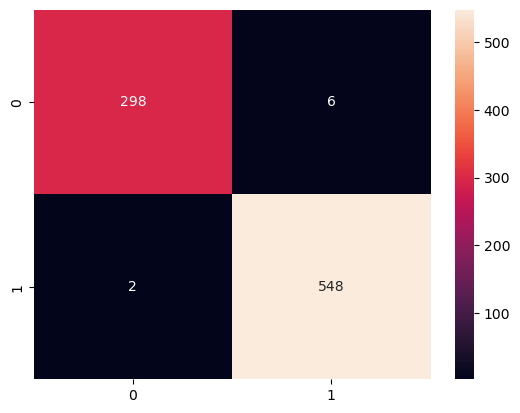

In [103]:
evaluate_model(rf,y_pred_rf)

In [104]:
svm=SVC()

In [105]:
svm.fit(x_train,y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [106]:
y_pred_svm=svm.predict(x_test)

Accuracy Train Score : 0.9505124450951684

Accuracy Test Score : 0.927400468384075

classification report:
               precision    recall  f1-score   support

           0       0.88      0.92      0.90       300
           1       0.96      0.93      0.94       554

    accuracy                           0.93       854
   macro avg       0.92      0.93      0.92       854
weighted avg       0.93      0.93      0.93       854



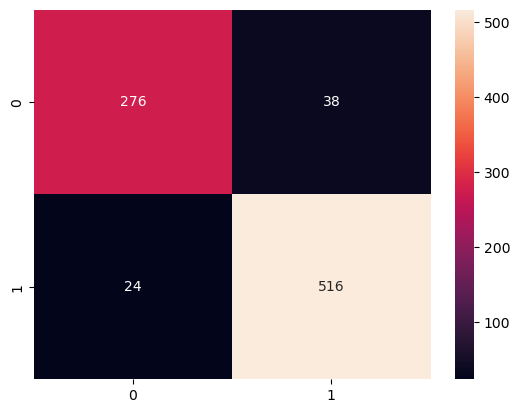

In [107]:
evaluate_model(svm,y_pred_svm)

In [108]:
import joblib

In [109]:
joblib.dump(rf,'loan_approval_rf_98.pkl')

['loan_approval_rf_98.pkl']

In [110]:
joblib.dump(mm, "loan_approval_scaler.pkl")

['loan_approval_scaler.pkl']